In [0]:
# %cd /content/gdrive/My Drive/Project/Project_Machine_learning/FastAI/food_classifier/foods_classifier
'''
from google.colab import drive
drive.mount('/content/gdrive')
'''
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt

In [0]:
'''
path = untar_data(URLs.PETS)
path_anno = path/'annotations'
path_img = path/'images'
fnames = get_image_files(path_img)
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

'''


'''
path = untar_data(URLs.MNIST_SAMPLE); path
'''

In [0]:
classes = ['cake','hotdog','pizza'] # Folder Name
for cl in classes:
    folder = cl
    file = "urls_"+cl+".txt"
    path = Path('./foods')
    dest = path/folder
    dest.mkdir(parents=True, exist_ok=True)
    download_images(path/file, dest, max_pics=200)


In [0]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

In [0]:
'''
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats) #data.show_batch(rows=3, figsize=(12,12))
'''


'''
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=26) # folder name ['train', 'valid', 'labels.csv', 'models']
'''


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

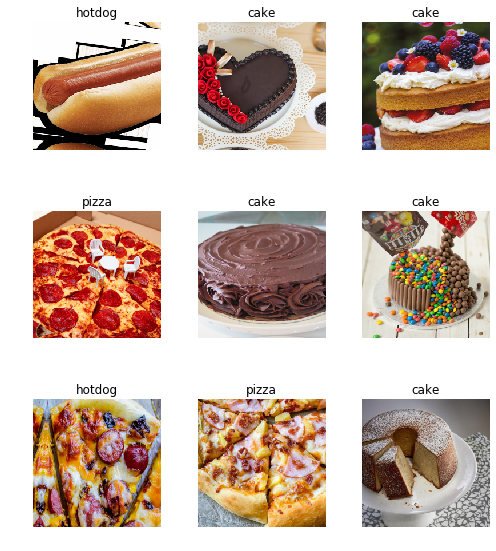

In [0]:
data.show_batch(rows=3, figsize=(7,8))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 76101496.88it/s]


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.410212,0.800483,0.253333,00:22
1,0.850732,0.237303,0.066667,00:22
2,0.583423,0.135875,0.040000,00:21
3,0.451857,0.111194,0.040000,00:22


In [0]:
'''
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)
'''

In [0]:
learn.save('stage-1_food')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

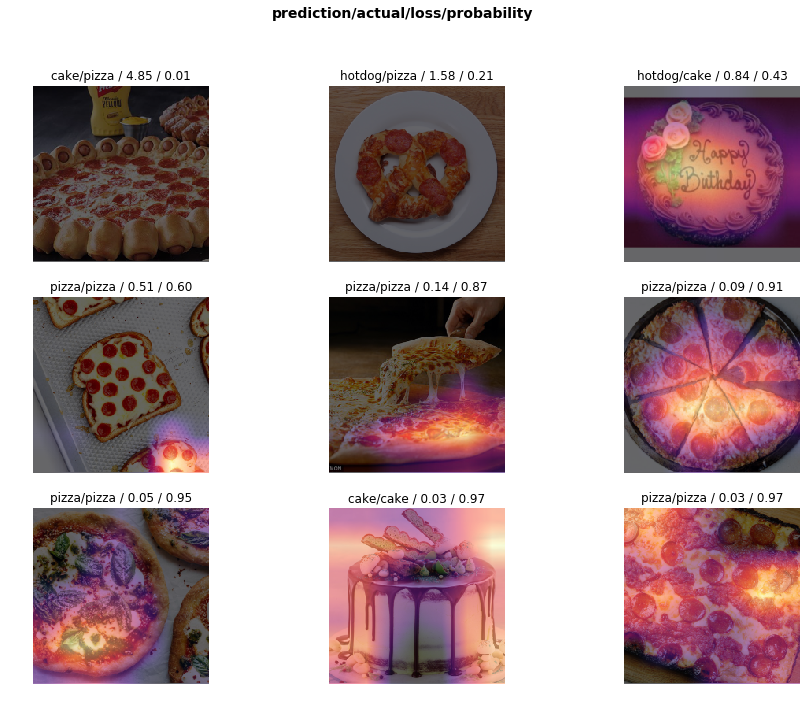

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

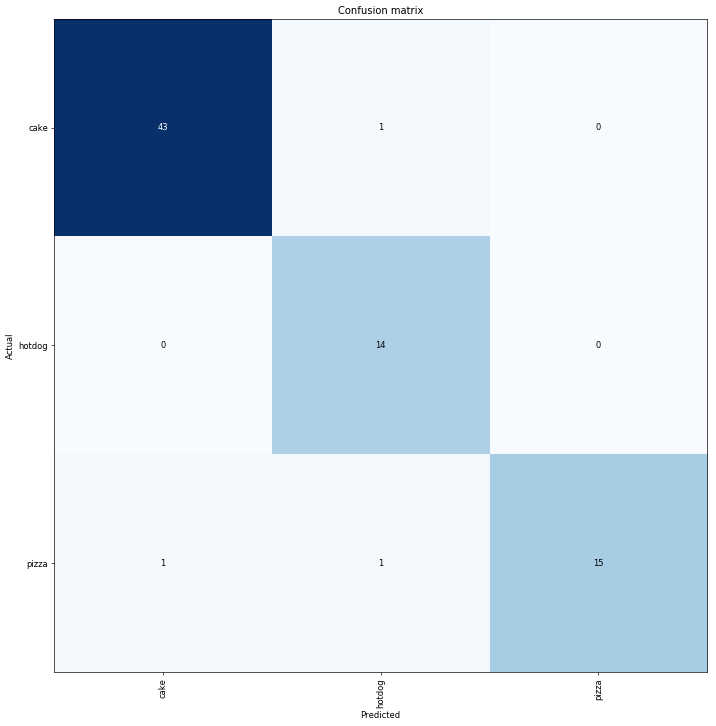

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


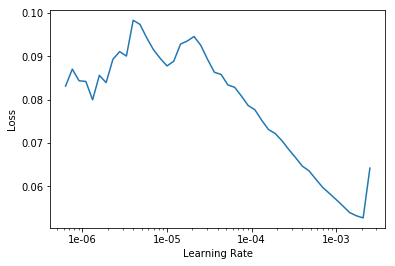

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [0]:
learn.export()

In [0]:
learn_predict = load_learner(path)

In [0]:
img = open_image(path/'pizza'/'00000098.png')

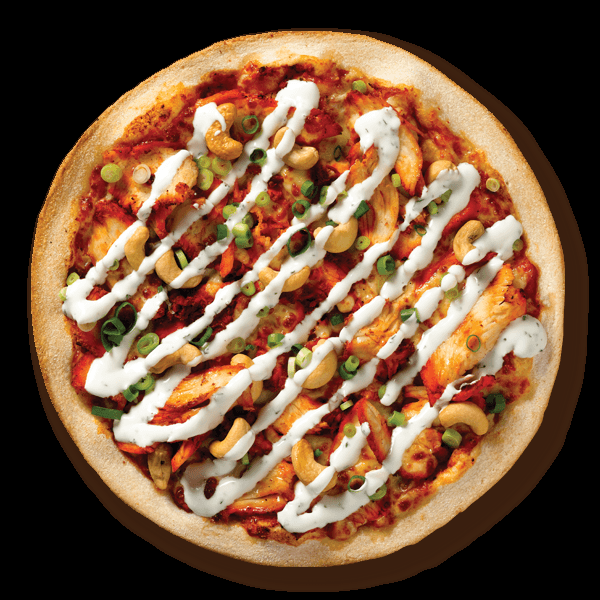

In [0]:
img

In [0]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category pizza